In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
!pip install kaggle

In [3]:
os.environ['KAGGLE_USERNAME'] = "meegayathri" # username from the json file
os.environ['KAGGLE_KEY'] = "012588e19b39d867d68bec9569278ebe" # key from the json file

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification #download data from kaggle

 98% 341M/346M [00:03<00:00, 74.8MB/s]
100% 346M/346M [00:03<00:00, 109MB/s] 


In [5]:
!ls

intel-image-classification.zip	sample_data


In [6]:
!mkdir dataset

In [7]:
!unzip -q intel-image-classification.zip -d dataset/

In [8]:
!ls

dataset  intel-image-classification.zip  sample_data


In [9]:
!ls dataset/

seg_pred  seg_test  seg_train


In [10]:
!ls dataset/seg_train/seg_train/

buildings  forest  glacier  mountain  sea  street


In [11]:
# Walk through pizza_steak directory and list number of files
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("dataset/seg_train/seg_train/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test data: ")
for dirpath, dirnames, filenames in os.walk("dataset/seg_test/seg_test/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk("dataset/seg_pred/seg_pred/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in 'dataset/seg_train/seg_train/'.
There are 0 directories and 2382 images in 'dataset/seg_train/seg_train/street'.
There are 0 directories and 2271 images in 'dataset/seg_train/seg_train/forest'.
There are 0 directories and 2512 images in 'dataset/seg_train/seg_train/mountain'.
There are 0 directories and 2191 images in 'dataset/seg_train/seg_train/buildings'.
There are 0 directories and 2404 images in 'dataset/seg_train/seg_train/glacier'.
There are 0 directories and 2274 images in 'dataset/seg_train/seg_train/sea'.
Test data: 
There are 6 directories and 0 images in 'dataset/seg_test/seg_test/'.
There are 0 directories and 501 images in 'dataset/seg_test/seg_test/street'.
There are 0 directories and 474 images in 'dataset/seg_test/seg_test/forest'.
There are 0 directories and 525 images in 'dataset/seg_test/seg_test/mountain'.
There are 0 directories and 437 images in 'dataset/seg_test/seg_test/buildings'.
There are 0 directories and

In [13]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
  # We will view image from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")

  return img

Image shape (150, 150, 3)


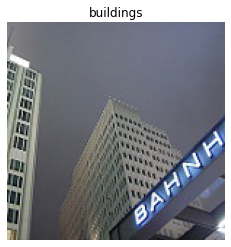

In [14]:
# sample image
img = view_random_image(target_dir='dataset/seg_train/seg_train/',
                  target_class='buildings')

In [15]:
# Get the class name programmatically
import pathlib
data_dir = pathlib.Path("dataset/seg_train/seg_train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [16]:
random.choice(class_names)

'buildings'

Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (119, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (111, 150, 3)


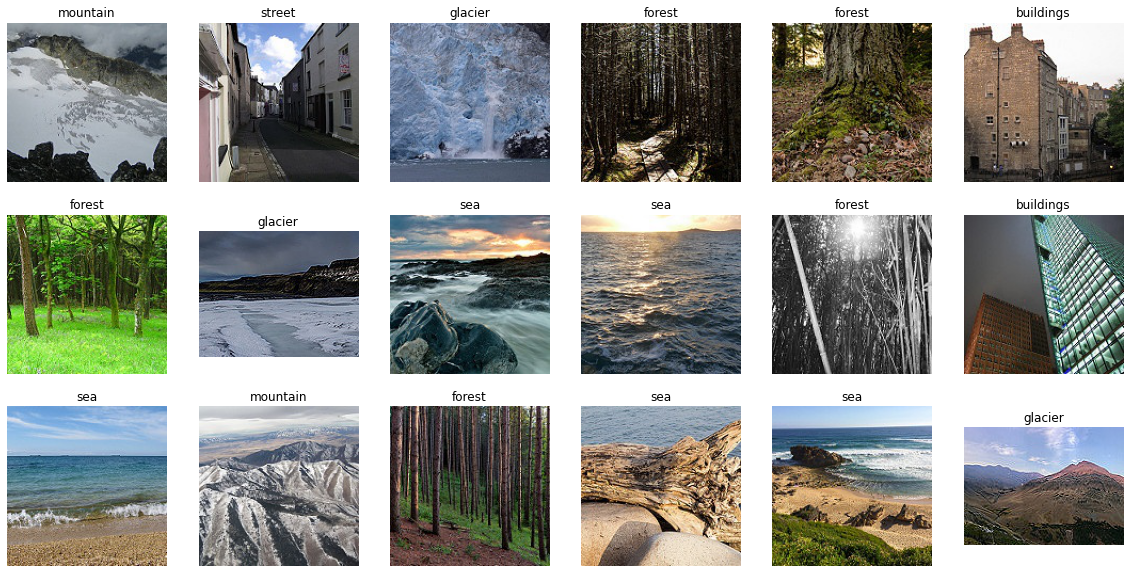

In [17]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir='dataset/seg_train/seg_train/',
                  target_class=class_name)

In [20]:
train_dir = "dataset/seg_train/seg_train"
test_dir = "dataset/seg_test/seg_test"

In [21]:
# Create augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [22]:
len(class_names)

6

In [23]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [24]:
model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                    epochs=20,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/20
439/439 [==============================] - 333s 757ms/step - loss: 0.3806 - accuracy: 0.8607 - val_loss: 0.3820 - val_accuracy: 0.8707
Epoch 2/20
439/439 [==============================] - 332s 756ms/step - loss: 0.3855 - accuracy: 0.8606 - val_loss: 0.3915 - val_accuracy: 0.8707


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe65e4677a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 3/20
227/439 [==============>...............] - ETA: 2:32 - loss: 0.3651 - accuracy: 0.8680

In [ ]:
loss_and_acc=model_1.evaluate(test_data)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

In [ ]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

In [ ]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');